In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
# Load the dataset
file_path = "D:/Assignments/imdb_movie_dataset (2).csv"  
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [19]:
# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


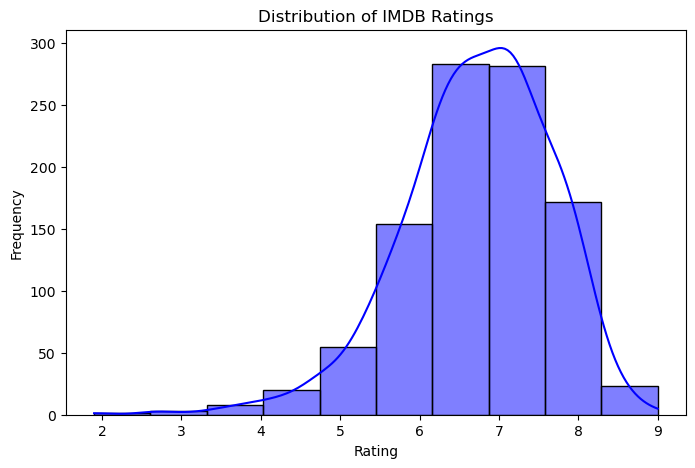

In [20]:
# Visualizing IMDB Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=10, kde=True, color='blue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Drop all rows with at least one missing value
df.dropna(inplace=True)

# Verify that no missing values remain in the dataset
print(df.isnull().sum())


Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [22]:

# Define the function to categorize ratings
def categorize_rating(rating):
    if 1 <= rating <= 3:
        return 'Flop'
    elif 4 <= rating <= 7:
        return 'Average/Niche'
    else:
        return 'Success'

# Apply transformation
df['Rating_2'] = df['Rating'].apply(categorize_rating)

# Display the transformed DataFrame
print(df)


     Rank                     Title                     Genre  \
0       1   Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2                Prometheus  Adventure,Mystery,Sci-Fi   
2       3                     Split           Horror,Thriller   
3       4                      Sing   Animation,Comedy,Family   
4       5             Suicide Squad  Action,Adventure,Fantasy   
..    ...                       ...                       ...   
993   994  Resident Evil: Afterlife   Action,Adventure,Horror   
994   995                 Project X                    Comedy   
996   997           Hostel: Part II                    Horror   
997   998    Step Up 2: The Streets       Drama,Music,Romance   
999  1000                Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...     

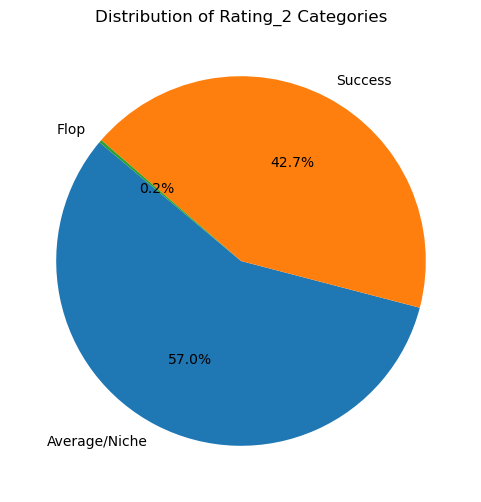

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Plot a pie chart of the 'Rating_2' distribution
category_counts = df['Rating_2'].value_counts()

plt.figure(figsize=(6, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating_2 Categories')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()


In [16]:
# Encode and Scale Features
#   - Genre is categorical, so we need OneHotEncoder.
#   - Numeric columns will be scaled using StandardScaler.
# Importing the neccesary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Selecting relevant features for modeling
numeric_features = ['Runtime (Minutes)', 'Revenue (Millions)', 'Metascore', 'Votes']
categorical_features = ['Genre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the Data into Train/Test Sets
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Fit the Preprocessor on the Training Data, Transform Both Train and Test
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# View train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in training set:\n", y_train.value_counts())

Training set shape: (800, 195)
Test set shape: (200, 195)
Target distribution in training set:
 Rating_2
Average/Niche    470
Success          328
Flop               2
Name: count, dtype: int64


Random Forest Accuracy: 0.805

Classification Report (Random Forest):
                precision    recall  f1-score   support

Average/Niche       0.83      0.85      0.84       120
         Flop       0.00      0.00      0.00         1
      Success       0.77      0.75      0.76        79

     accuracy                           0.81       200
    macro avg       0.53      0.53      0.53       200
 weighted avg       0.80      0.81      0.80       200



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


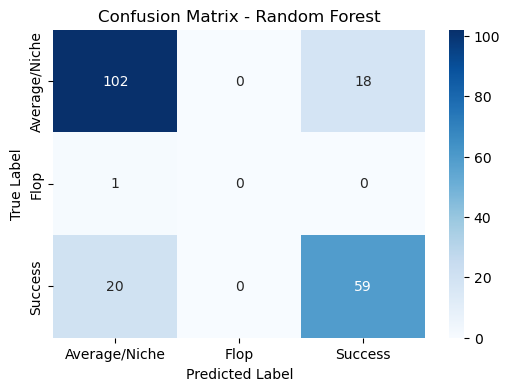

In [23]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


SVM Accuracy: 0.805

Classification Report (SVM):
                precision    recall  f1-score   support

Average/Niche       0.83      0.84      0.84       120
         Flop       0.00      0.00      0.00         1
      Success       0.76      0.76      0.76        79

     accuracy                           0.81       200
    macro avg       0.53      0.53      0.53       200
 weighted avg       0.80      0.81      0.80       200



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


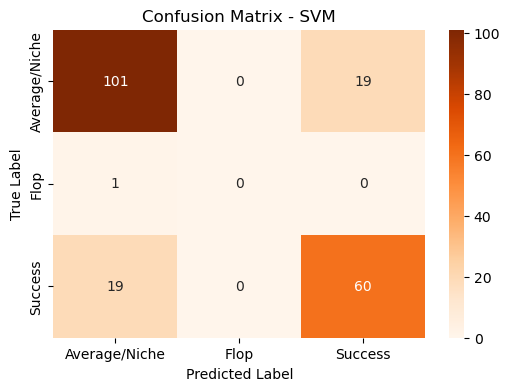

In [24]:
# Import Libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the Model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
